출처: https://www.quora.com/What-are-the-main-differences-between-TensorFlow-and-SciKit-Learn

## What are the main differences between TensorFlow and SciKit Learn?

TensorFlow is more  low-level; basically, the Lego bricks that help you to implement machine learning algorithms whereas scikit-learn offers you off-the-shelf algorithms, e.g., algorithms for classification such as SVMs, Random Forests, Logistic Regression, and many, many more. TensorFlow really shines if you want to implement deep learning algorithms, since it allows you to take advantage of GPUs for more efficient training.

To give you a better idea, let's fit a softmax regression model on the Iris dataset via scikit-learn:


In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
 
# Loading Data
iris = load_iris()
X = iris.data[:, [0, 3]] # sepal length and petal width
y = iris.target
 
# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
 
lr = LogisticRegression(penalty='l2', 
                        dual=False, tol=0.000001, 
                        C=10.0, fit_intercept=True, 
                        intercept_scaling=1, class_weight=None, 
                        random_state=1, solver='newton-cg', 
                        max_iter=100, multi_class='multinomial', 
                        verbose=0, warm_start=False, n_jobs=8)
lr.fit(X, y) 
y_pred = lr.predict(X)
print('Last 3 Class Labels: %s' % y_pred[-3:])

Last 3 Class Labels: [2 2 2]


In addition, I have a little helper function to plot the 2D decision surface:

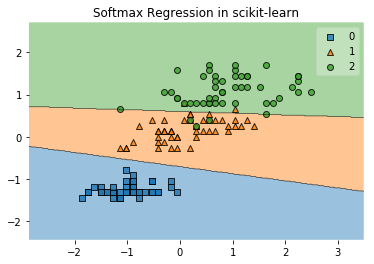

In [5]:
from mlxtend.plotting import plot_decision_regions
 
plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression in scikit-learn')
plt.show()

That was easy, right? :). Now, if we want to fit a Softmax regression model via TensorFlow, however, we have to "build" the algorithm first. But it really sounds more complicated than it really is.

TensorFlow comes with many "convenience" functions and utilities, for example, if we want to use a gradient descent optimization approach, the core or our implementation could look like this:

In [12]:
import tensorflow as tf
import pandas as pd

X = iris.data[:, [0, 3]] # sepal length and petal width
y = iris.target

x = tf.placeholder(tf.float32,[None, 4])
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

# Softmax Regression
# y = softmax(W*x + b)



[[ 5.1  0.2]
 [ 4.9  0.2]
 [ 4.7  0.2]
 [ 4.6  0.2]
 [ 5.   0.2]
 [ 5.4  0.4]
 [ 4.6  0.3]
 [ 5.   0.2]
 [ 4.4  0.2]
 [ 4.9  0.1]
 [ 5.4  0.2]
 [ 4.8  0.2]
 [ 4.8  0.1]
 [ 4.3  0.1]
 [ 5.8  0.2]
 [ 5.7  0.4]
 [ 5.4  0.4]
 [ 5.1  0.3]
 [ 5.7  0.3]
 [ 5.1  0.3]
 [ 5.4  0.2]
 [ 5.1  0.4]
 [ 4.6  0.2]
 [ 5.1  0.5]
 [ 4.8  0.2]
 [ 5.   0.2]
 [ 5.   0.4]
 [ 5.2  0.2]
 [ 5.2  0.2]
 [ 4.7  0.2]
 [ 4.8  0.2]
 [ 5.4  0.4]
 [ 5.2  0.1]
 [ 5.5  0.2]
 [ 4.9  0.1]
 [ 5.   0.2]
 [ 5.5  0.2]
 [ 4.9  0.1]
 [ 4.4  0.2]
 [ 5.1  0.2]
 [ 5.   0.3]
 [ 4.5  0.3]
 [ 4.4  0.2]
 [ 5.   0.6]
 [ 5.1  0.4]
 [ 4.8  0.3]
 [ 5.1  0.2]
 [ 4.6  0.2]
 [ 5.3  0.2]
 [ 5.   0.2]
 [ 7.   1.4]
 [ 6.4  1.5]
 [ 6.9  1.5]
 [ 5.5  1.3]
 [ 6.5  1.5]
 [ 5.7  1.3]
 [ 6.3  1.6]
 [ 4.9  1. ]
 [ 6.6  1.3]
 [ 5.2  1.4]
 [ 5.   1. ]
 [ 5.9  1.5]
 [ 6.   1. ]
 [ 6.1  1.4]
 [ 5.6  1.3]
 [ 6.7  1.4]
 [ 5.6  1.5]
 [ 5.8  1. ]
 [ 6.2  1.5]
 [ 5.6  1.1]
 [ 5.9  1.8]
 [ 6.1  1.3]
 [ 6.3  1.5]
 [ 6.1  1.2]
 [ 6.4  1.3]
 [ 6.6  1.4]
 [ 6.8  1.4]

In [8]:
# Construct the Graph
g = tf.Graph()
with g.as_default():
    if init_weights:
        self._n_classes = np.max(y) + 1
        self._n_features = X.shape[1]
        tf_weights_, tf_biases_ = self._initialize_weights(
        n_features=self._n_features,
        n_classes=self._n_classes)
        self.cost_ = []
    else:
        tf_weights_ = tf.Variable(self.weights_)
        tf_biases_ = tf.Variable(self.biases_)

# Prepare the training data

y_enc = self._one_hot(y, self._n_classes)
n_idx = list(range(y.shape[0]))
tf_X = tf.convert_to_tensor(value=X, dtype=self.dtype)
tf_y = tf.convert_to_tensor(value=y_enc, dtype=self.dtype)
tf_idx = tf.placeholder(tf.int32, shape=[int(y.shape[0] / n_batches)])
X_batch = tf.gather(params=tf_X, indices=tf_idx)
y_batch = tf.gather(params=tf_y, indices=tf_idx)

# Setup the graph for minimizing cross entropy cost
logits = tf.matmul(X_batch, tf_weights_) + tf_biases_
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits,
                                                      y_batch)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.eta)
train = optimizer.minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

# And we can execute the training as follows:

NameError: name 'init_weights' is not defined